# Chapter 14: Recurrent Neural Networks

Recurrent neural networks (RNNs) are a particular type of artificial neural network which are able to accurately make predictions about sequences of data. They are useful for _natural language processing_ (NLP), automatic translation, speech-to-text, or _sentiment analysis_.

Some RNNs such as [Google's Magenta project](https://cdn2.vox-cdn.com/uploads/chorus_asset/file/6577761/Google_-_Magenta_music_sample.0.mp3) are capable of writing their own melodies. RNNs can [generate sentences](https://karpathy.github.io/2015/05/21/rnn-effectiveness/), [image captions](https://arxiv.org/pdf/1411.4555v2.pdf), and more.

## Recurrent Neurons

Up until now, we have looked mainly at feed-forward neural networks where data only flows in one direction. Neurons in an RNN depend not only on the input data, but also the outputs of the neurons at previous iterations of the sequence of data. At each _time step_ (or _frame_), the _recurrent neuron_ receives the input, $\mathbf{x}_{(t)}$, as well as its output in the previous frame, $y_{(t-1)}$. The output of a layer of recurrent neurons is given by

$$ \mathbf{y}_{(t)} = \phi\left( \mathbf{W}_x^{\,T} \cdot \mathbf{x}_{(t)} + \mathbf{W}_y^{\,T} \cdot \mathbf{y}_{(t-1)} + \mathbf{b} \right) $$

where

- $\mathbf{W}_x$ and $\mathbf{W}_y$ are the weight matrices of the recurrent neuron layer.

- $\mathbf{y}_{(t-1)}$ is the output of the layer at the previous frame.

- $\mathbf{b}$ is the bias vector.

- $\phi$ is the layer's activation function.

While training the RNN, you can compute the output of a whole mini-batch in one computation given by

$$ \mathbf{Y}_{(t)} = \phi\left( \mathbf{X}_{(t)} \cdot \mathbf{W}_x + \mathbf{Y}_{(t-1)} \cdot \mathbf{W}_y + \mathbf{b} \right)$$
$$ = \phi\left( \left[ \mathbf{X}_{(t)} \; \mathbf{Y}_{(t-1)} \right] \cdot \mathbf{W} + \mathbf{b} \right) \;\; \text{with} \;\; \mathbf{W} = \left[ \begin{matrix} \mathbf{W}_x \\ \mathbf{W}_y \end{matrix} \right] $$

where

- $\mathbf{Y}_{(t)}$ is an $m \times n_\text{neurons}$ matrix containing the layer's outputs at frame $t$.

- $\mathbf{X}_{(t)}$ is an $m \times n_\text{inputs}$ matrix containing the inputs of all instances in the mini-batch at frame $t$.

- $\mathbf{W}_x$ is an $n_\text{inputs} \times n_\text{neurons}$ matrix containing the connection weights for the inputs at the current frame.

- $\mathbf{W}_y$ is an $n_\text{neurons} \times n_\text{neurons}$ matrix containing the connection weights for the outputs of the previous frame.

- $\mathbf{b}$ is the bias vector of size $n_\text{neurons}$.

- The weights matrices are often concatenated vertically into a single $\left( n_\text{inputs} + n_\text{neurons} \right) \times n_\text{neurons}$ matrix, $\mathbf{W}$.

- The notation $\left[ \mathbf{X}_{(t)} \; \mathbf{Y}_{(t-1)} \right]$ represents the horizontal concatenation of the matrices $\mathbf{X}_{(t)}$ and $\mathbf{Y}_{(t-1)}$.

### Memory Cells

Since the output of a recurrent neuron depends on its previous outputs, one can say it develops a form of _memory_. A part of a neural network which retains state across time steps is called a _memory cell_. A single recurrent neuron or a layer of recurrent neurons is a very _basic cell_.

In general, a cell's state at frame $t$, i.e. $\mathbf{h}_{(t)}$, is a function of the inputs at the frame $t$ as well as the state at the previous time step. In other words,

$$ \mathbf{h}_{(t)} = f \kern-0.15em \left(\mathbf{h}_{(t-1)}, \mathbf{x}_{(t)}\right). $$

The output of the recurrent neuron is also a function of the previous state and the current inputs. In the case of the basic cell, the output is equal to the state at frame $t$, but for other types of memory cells this is not the case.

### Input and Output Sequences

An output of an RNN can be its prediction of the next terms in the input sequence, such as predicting the future stock prices based on their previous prices. For example you can feed it the prices for the last $N$ days and have it predict the prices for $N-1$ days ago up to tomorrow.

You can also have the network ignore all outputs except the last one, this is called a sequence-to-vector RNN. For example, the input could be a movie review and the output could be a measure of the sentiment of the review (positive or negative).

You can also have vector-to-sequence network which takes a single input and outputs a new sequence, e.g. a model which generates captions for images.

Finally, you can have a sequence-to-vector network called an _encoder_, and a vector-to-sequence network called a _decoder_. This two step model, called an Encoder-Decoder, works well for tasks like translating languages. In fact they outperform sequence-to-sequence RNNs for that particular task.

## Basic RNNs in TensorFlow

Below is an example of an RNN composed of a single layer of 5 recurrent neurons over only two time steps:

In [0]:
import tensorflow as tf

n_inputs = 3
n_neurons = 5

graph = tf.Graph()

with graph.as_default():
  X0 = tf.placeholder(tf.float32, [None, n_inputs])
  X1 = tf.placeholder(tf.float32, [None, n_inputs])

  Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],
                                    dtype=tf.float32))
  Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons],
                                    dtype=tf.float32))
  b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

  Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
  Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

  init = tf.global_variables_initializer()

In [0]:
# Creating input for the model and evaluating the output.

import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [3]:
Y0_val  # output at t = 0

array([[ 0.9834298 , -0.9950613 ,  0.81300235,  0.9367092 , -0.9272306 ],
       [ 0.9671495 , -0.99999976,  0.9997395 ,  0.9113673 , -0.9993264 ],
       [ 0.935395  , -1.        ,  0.9999997 ,  0.8765254 , -0.9999939 ],
       [-1.        ,  0.99955785,  0.9999934 , -0.9999937 ,  0.98964983]],
      dtype=float32)

In [4]:
Y1_val  # output at t = 1

array([[-0.99032956, -1.        ,  0.99999917, -0.99999714, -0.9999999 ],
       [ 0.6346872 , -0.9884779 , -0.94479597, -0.9996923 , -0.9981447 ],
       [-0.9829022 , -1.        ,  0.9989397 , -0.9999945 , -0.999996  ],
       [-0.9968052 , -0.24302416,  0.983999  ,  0.99925935, -0.98118323]],
      dtype=float32)

### Static Unrolling Through Time

In [6]:
# The following code creates the same exact RNN, but without the need to repeat
# code for every time step.

graph = tf.Graph()

with graph.as_default():
  X0 = tf.placeholder(tf.float32, [None, n_inputs])
  X1 = tf.placeholder(tf.float32, [None, n_inputs])

  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                  dtype=tf.float32)
  Y0, Y1 = output_seqs

  init = tf.global_variables_initializer()

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

print(Y0_val)
print(Y1_val)

[[-0.56465685  0.7726155   0.6464381   0.6898657   0.2079131 ]
 [-0.9570511   0.9778706   0.99812806  0.99381816  0.28276926]
 [-0.996544    0.9980501   0.99999195  0.9998953   0.35433275]
 [-0.7598727   0.34146777  0.9999943   0.9989586  -0.998472  ]]
[[-0.9983283   0.99639106  0.9999999   0.9998473   0.5507407 ]
 [-0.5829546   0.6298226   0.92501825 -0.67715055  0.6853758 ]
 [-0.9888976   0.97438437  0.99999344  0.98423547  0.6937495 ]
 [-0.83895236  0.5099309   0.9973836   0.1412082  -0.3224336 ]]


Since it is not convenient to write a new input placeholder for each frame of the sequence, TensorFlow provides the `static_rnn()` function to let you be able to train RNNs with a variable number of frames. It returns two objects, a Python list of the output sequences and the final states of the network. For basic cells, the final state is the final output of the network.

In [0]:
n_steps = 2

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  # Unstack separates a tensor or rank r into a List of tensors of rank r - 1.
  X_seqs = tf.unstack(tf.transpose(X, perm=(1, 0, 2)))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                  dtype=tf.float32)
  outputs = tf.transpose(tf.stack(output_seqs), perm=(1, 0, 2))
  init = tf.global_variables_initializer()

In [0]:
X_batch = np.array([
  [[0, 1, 2], [9, 8, 7]],
  [[3, 4, 5], [0, 0, 0]],
  [[6, 7, 8], [6, 5, 4]],
  [[9, 0, 1], [3, 2, 1]],
])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [9]:
print(outputs_val)

[[[-0.5450363  -0.19677536 -0.69643223 -0.51478654  0.8079703 ]
  [-0.9920196   0.9952052   0.1205921   0.9995122   1.        ]]

 [[-0.9365034   0.5930897  -0.77913636  0.5733019   0.9999492 ]
  [-0.8218537   0.6386266   0.58871126  0.31494588  0.31038925]]

 [[-0.99272436  0.9161004  -0.84141487  0.95396215  1.        ]
  [-0.996382    0.9946776   0.8955173   0.99803364  0.9999995 ]]

 [[ 0.85002196  0.2819989   0.9992663   0.99997     0.99983877]
  [-0.06719761  0.96340877  0.9777923   0.9121383   0.99319476]]]


The `static_rnn()` function creates a new graph node for each cell for each frame. This means that for sequences with a large number of frames, you risk the graph causing an out of memory (OOM) error. Thankfully there is the `dynamic_rnn()` function.

### Dynamic Unrolling Through Time

The `dynamic_rnn()` function uses a `while_loop()` operation to run over the cell the appropriate number of times and can swap memory between the GPU and CPU using the `swap_memory=True` parameter. The `dynamic_rnn()` function also accepts a single Tensor for all inputs, meaning you do not need to do any stacking like in the last example.

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

### Handling Variable Length Input Sequences

In order to handle inputs of variable length, such as sentences, you can use set the `sequence_length` parameter of the `dynamic_rnn()` as a 1D tensor which indicates the length of the each input sequence. Below is an example:

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  seq_length = tf.placeholder(tf.int32, shape=(None))
  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                      sequence_length=seq_length)
  init = tf.global_variables_initializer()

Each input sequence which is shorter than the maximum length sequence, it must be padded with zeros at the end. Below is an example where the second sequence has only 1 frame whereas the others have two.

In [0]:
X_batch = np.array([
  [[0, 1, 2], [9, 8, 7]],
  [[3, 4, 5], [0, 0, 0]],
  [[6, 7, 9], [6, 5, 4]],
  [[9, 0, 1], [3, 2, 1]],
])
seq_length_batch = np.array([2, 1, 2, 2])

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch,
                                          seq_length: seq_length_batch})

In [15]:
print(outputs_val)

[[[ 0.39076197  0.05958096  0.4086122  -0.92413366  0.0900095 ]
  [-0.09409263  0.99999964  0.9998155  -0.9963912   0.99998176]]

 [[ 0.5158535   0.9892193   0.98368573 -0.9965462   0.95364594]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.80726194  0.99990934  0.9996575  -0.99995476  0.9987795 ]
  [-0.8553089   0.99899536  0.96943855 -0.955811    0.99911904]]

 [[ 0.58124167  0.9999691   0.9340429   0.9990546   0.99991375]
  [-0.8944918   0.6084823   0.9018325  -0.15128036  0.7051749 ]]]


### Handling Variable-Length Output Sequences

If the output sequence has a variable length, such as when you are translating sentences into another language, in general it is not possible to set a `sequence_length` during training. The most common solution is to define an _end-of-sequence_ (EOS) character, so that any output beyond that character is ignored.

## Training RNNs

The trick for training RNNs is to unroll them through time and then use backpropagation on the unrolled graph. This strategy is called _backpropagation through time_ (BPTT). The RNN first computes the output using forward propagation, then the output is evaluated using a cost function

$$ C \left( \mathbf{Y}_{t_\text{min}}, \mathbf{Y}_{t_\text{min}+1}, ..., \mathbf{Y}_{t_\text{max}} \right) $$

where $t_\text{min}$ and $t_\text{max}$ are the minimum and maximum output time steps (not including ignored outputs earlier in the sequence). The model then uses backpropagation to compute the error gradients and uses this to update the model parameters. If the outputs from some time steps are ignored, they do not contribute to the error gradient during training. However, since all time steps share the same parameters ($\mathbf{W}$ and $\mathbf{b}$), backpropagation will still sum over all time steps.

### Training a Sequence Classifier

Below is an example of training a RNN to classify images in the MNIST dataset. Even though convolutional neural networks (see Chapter 13) are better for image classification, this familiar example is useful for demonstrative purposes.

In [0]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.int32, (None))

  basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
  outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

  logits = tf.layers.dense(states, n_outputs)
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                            logits=logits)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def shuffle_batch(X, y, batch_size):
  rnd_idx = np.random.permutation(len(X))
  n_batches = len(X) // batch_size
  for batch_idx in np.array_split(rnd_idx, n_batches):
    X_batch, y_batch = X[batch_idx], y[batch_idx]
    yield X_batch, y_batch

In [0]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [0]:
n_epochs = 100
batch_size = 150

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
          X_batch = X_batch.reshape((-1, n_steps, n_inputs))
          sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if epoch % 5 == 0:
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print('Train accuracy:', acc_train, 'Test accuracy:', acc_test)

0 Train accuracy: 0.30666667 Test accuracy: 0.2735
5 Train accuracy: 0.6666667 Test accuracy: 0.7017
10 Train accuracy: 0.8 Test accuracy: 0.7769
15 Train accuracy: 0.7733333 Test accuracy: 0.815
20 Train accuracy: 0.76666665 Test accuracy: 0.8374
25 Train accuracy: 0.85333335 Test accuracy: 0.8512
30 Train accuracy: 0.8666667 Test accuracy: 0.8635
35 Train accuracy: 0.86 Test accuracy: 0.8717
40 Train accuracy: 0.87333333 Test accuracy: 0.8794
45 Train accuracy: 0.9066667 Test accuracy: 0.8875
50 Train accuracy: 0.9066667 Test accuracy: 0.8943
55 Train accuracy: 0.93333334 Test accuracy: 0.8988
60 Train accuracy: 0.9066667 Test accuracy: 0.9046
65 Train accuracy: 0.93333334 Test accuracy: 0.9088
70 Train accuracy: 0.9 Test accuracy: 0.9129
75 Train accuracy: 0.9066667 Test accuracy: 0.9151
80 Train accuracy: 0.88666666 Test accuracy: 0.9182
85 Train accuracy: 0.87333333 Test accuracy: 0.9205
90 Train accuracy: 0.9533333 Test accuracy: 0.9237
95 Train accuracy: 0.92 Test accuracy: 0.92

The model achieves 92% accuracy, which is not too great compared to CNNs.

### Training to Predict Time Series

Training an RNN with a single layer of 100 neurons. We will unroll it over 20 time steps where each input is a single feature. The target set is also sequences of 20 single features. It uses an `OutputProjectionWrapper` which adds a set of fully connected layer of linear neurons (with no activation function) on top of each output, separate from the cell state. They each have shared weights and biases that the model learns during training. 

In [0]:
# This code generates the time series we will be predicting.

t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
  return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
  t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
  ts = t0 + np.arange(0., n_steps + 1) * resolution
  ys = time_series(ts)
  return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

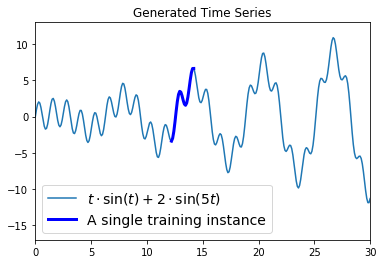

In [24]:
# Displaying the generated time series.

import matplotlib.pyplot as plt

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.title('Generated Time Series')
plt.plot(t, time_series(t), label='$t \cdot \sin(t) + 2 \cdot \sin(5t) $')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'b-', linewidth=3,
         label='A single training instance')
plt.legend(loc='lower left', fontsize=14)
plt.axis([0, 30, -17, 13])
plt.show()

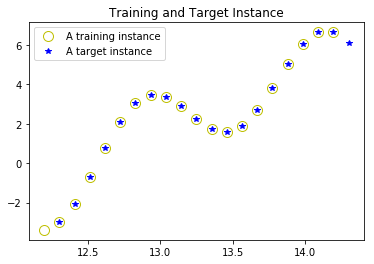

In [44]:
# Plotting a training instance and target instance.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'b*',
         label='A target instance')
plt.legend(loc='upper left')
plt.show()

In [0]:
# Defining the model graph.

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  cell = tf.contrib.rnn.OutputProjectionWrapper(
      tf.contrib.rnn.BasicRNNCell(n_neurons, dtype=tf.float32),
      output_size=n_outputs)
  outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [42]:
# Training the model.

n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 4.66175
100 	MSE: 0.16126975
200 	MSE: 0.09532945
300 	MSE: 0.082004
400 	MSE: 0.069737375
500 	MSE: 0.06309689
600 	MSE: 0.058964457
700 	MSE: 0.050969504
800 	MSE: 0.044268537
900 	MSE: 0.045503315
1000 	MSE: 0.050827987
1100 	MSE: 0.04213542
1200 	MSE: 0.046863467
1300 	MSE: 0.039936036
1400 	MSE: 0.033970512


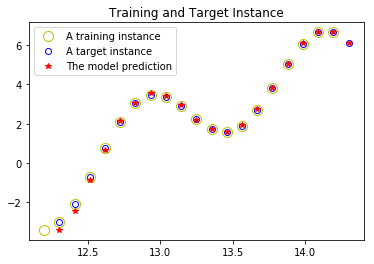

In [58]:
# Plotting the prediction of the model.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'bo', mfc='none',
         label='A target instance')

with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    X_new = time_series(
        np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.plot(t_instance[1:], y_pred[0,:,0], 'r*', label='The model prediction')
plt.legend(loc='upper left')
plt.show()

It is possible to predict a time series without the `OutputProjectionMapper` in a more complex, but more efficient way. You can stack the RNN outputs at each time step (whos shape is originally `[batch_size, n_steps, n_neurons]`) into the shape `[batch_size * n_steps, n_neurons]`, then it applies a single, fully connected layer with the right output size. The result will have the shape `[batch_size * n_steps, n_outputs]` so we will reshape it to `[batch_size, n_steps, n_outputs]`. Below is a code example which uses this method on the same task as above: 

In [0]:
graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_outputs))

  cell = tf.contrib.rnn.BasicRNNCell(n_neurons, dtype=tf.float32)
  rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

  stacked_rnn_outputs = tf.reshape(rnn_outputs, (-1, n_neurons))
  stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
  outputs = tf.reshape(stacked_outputs, (-1, n_steps, n_outputs))

  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)

  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [66]:
n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 6.2858095
100 	MSE: 0.15273757
200 	MSE: 0.099299
300 	MSE: 0.09494527
400 	MSE: 0.071992084
500 	MSE: 0.06048573
600 	MSE: 0.05358586
700 	MSE: 0.037519827
800 	MSE: 0.052616816
900 	MSE: 0.04677847
1000 	MSE: 0.0414243
1100 	MSE: 0.048052598
1200 	MSE: 0.037101965
1300 	MSE: 0.044686966
1400 	MSE: 0.038650557


### Creative RNN

We can have the model generate an entirely new series. We first train the model (or used the trained model above). Then we provide it a seed sequence, it could be a training instance or a sequence of zeros. We have the model predict the last step in the sequence, then you feed it the next `n_steps` and then the model predicts the next term in the sequence. You can repeat this process to generate an entirely new sequence.

In [0]:
# Seeding it with a sequence of zeros.

sequence = [0.0] * n_steps
with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    for iteration in range(300):
      X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
      y_pred = sess.run(outputs, feed_dict={X: X_batch})
      sequence.append(y_pred[0,-1,0])

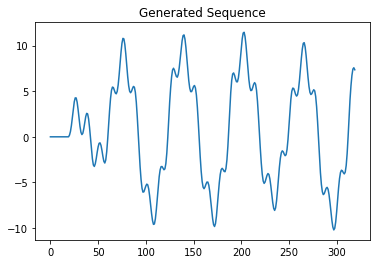

In [70]:
# Plotting the result.

plt.plot(np.arange(len(sequence)), sequence)
plt.title('Generated Sequence')
plt.show()

In [0]:
# Repeating the same task, but using a training instance as the seed.

sequence = [time_series((i * resolution) + t_min + t_max - (t_min / 3))
            for i in range(n_steps)]
with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    for iteration in range(300):
      X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
      y_pred = sess.run(outputs, feed_dict={X: X_batch})
      sequence.append(y_pred[0,-1,0])

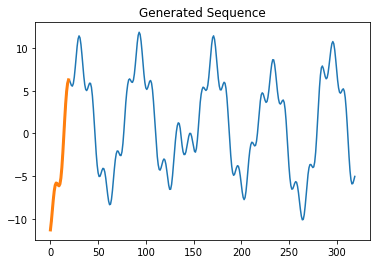

In [73]:
# Plotting the result.

plt.plot(np.arange(len(sequence)), sequence)
plt.plot(np.arange(n_steps), sequence[:n_steps], linewidth=3)
plt.title('Generated Sequence')
plt.show()

## Deep RNNs

A _deep RNN_ is one that stacks multiple layers of cells. Below is an example of a deep RNN which uses the `MultiRNNCell`.

In [0]:
n_steps = 28
n_inputs = 28
n_outputs = 10
n_neurons = 100
n_layers = 3
learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, (None, n_steps, n_inputs))
  y = tf.placeholder(tf.int32, (None))
  layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons,
                                        activation=tf.nn.relu)
            for layer in range(n_layers)]
  multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
  outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
  flattened_states = tf.concat(axis=1, values=states)
  logits = tf.layers.dense(flattened_states, n_outputs)
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                            logits=logits)
  loss = tf.reduce_mean(xentropy)
  optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)
  correct = tf.nn.in_top_k(logits, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()

In [76]:
n_epochs = 25
batch_size = 150

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
          X_batch = X_batch.reshape((-1, n_steps, n_inputs))
          sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
      acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
      print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)

0 Train accuracy: 0.14 Test accuracy: 0.1568
1 Train accuracy: 0.16 Test accuracy: 0.1796
2 Train accuracy: 0.35333332 Test accuracy: 0.3128
3 Train accuracy: 0.64666665 Test accuracy: 0.5418
4 Train accuracy: 0.6666667 Test accuracy: 0.6485
5 Train accuracy: 0.7 Test accuracy: 0.6787
6 Train accuracy: 0.64666665 Test accuracy: 0.6976
7 Train accuracy: 0.68666667 Test accuracy: 0.7063
8 Train accuracy: 0.6933333 Test accuracy: 0.7151
9 Train accuracy: 0.70666665 Test accuracy: 0.7251
10 Train accuracy: 0.74 Test accuracy: 0.7325
11 Train accuracy: 0.75333333 Test accuracy: 0.7391
12 Train accuracy: 0.76 Test accuracy: 0.7463
13 Train accuracy: 0.7 Test accuracy: 0.7528
14 Train accuracy: 0.74666667 Test accuracy: 0.7614
15 Train accuracy: 0.79333335 Test accuracy: 0.7673
16 Train accuracy: 0.79333335 Test accuracy: 0.7716
17 Train accuracy: 0.81333333 Test accuracy: 0.7783
18 Train accuracy: 0.86 Test accuracy: 0.7826
19 Train accuracy: 0.79333335 Test accuracy: 0.7831
20 Train accurac

### Distributing a Deep RNN Across Multiple Devices

In [0]:
# The following code will not work since BasicRNNCell is not an actual cell
# itself, rather it is a cell factory, it does not produce any cells by itself.

with tf.device('/gpu:0'):
  layer1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

with tf.device('/gpu:1'):
  layer2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [0]:
# The proper way to distribute an RNN.

class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device
  
  @property
  def state_size(self):
    return self._cell.state_size
  
  @property
  def output_size(self):
    return self._cell.output_size
  
  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
      return self._cell(inputs, state, scope)

In [0]:
# Using the new factory in a graph.

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  devices = ['/gpu:0', '/gpu:1', '/gpu:2']
  cells = [
    DeviceCellWrapper(dev, tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))
    for dev in devices
  ]
  multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
  outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

### Applying Dropout

In order to prevent a deep RNN from overfitting, we are going to add dropout.

In [0]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

learning_rate = 0.01

graph = tf.Graph()

with graph.as_default():
  X = tf.placeholder(tf.float32, shape=(None, n_steps, n_inputs))
  y = tf.placeholder(tf.float32, (None, n_steps, n_outputs))
  keep_prob = tf.placeholder_with_default(1.0, shape=())
  cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for _ in range(n_layers)]
  cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
                for cell in cells]
  multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
  rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

  # Same code as before...
  stacked_rnn_outputs = tf.reshape(rnn_outputs, (-1, n_neurons))
  stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
  outputs = tf.reshape(stacked_outputs, (-1, n_steps, n_outputs))

  loss = tf.reduce_mean(tf.square(outputs - y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  training_op = optimizer.minimize(loss)

  saver = tf.train.Saver()
  init = tf.global_variables_initializer()

In [87]:
n_iterations = 1500
batch_size = 50

with graph.as_default():
  with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
      X_batch, y_batch = next_batch(batch_size, n_steps)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch, keep_prob: 0.5})
      if iteration % 100 == 0:
        mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
        print(iteration, '\tMSE:', mse)
    saver.save(sess, './time_series_model.ckpt')

0 	MSE: 11.652617
100 	MSE: 5.6378713
200 	MSE: 5.6762824
300 	MSE: 2.6852584
400 	MSE: 4.659208
500 	MSE: 4.0943856
600 	MSE: 3.8520205
700 	MSE: 3.9903667
800 	MSE: 4.800538
900 	MSE: 5.6944103
1000 	MSE: 4.888236
1100 	MSE: 4.843078
1200 	MSE: 3.624496
1300 	MSE: 5.2199135
1400 	MSE: 5.9356036


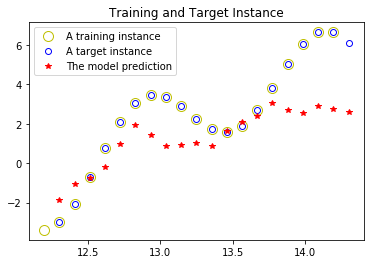

In [89]:
# Plotting the prediction of the model with dropout.
# For this example, dropout made the model perform worse.

plt.title('Training and Target Instance')
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'yo', markersize=10,
         label='A training instance', mfc='none')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'bo', mfc='none',
         label='A target instance')

with graph.as_default():
  with tf.Session() as sess:
    saver.restore(sess, './time_series_model.ckpt')
    X_new = time_series(
        np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.plot(t_instance[1:], y_pred[0,:,0], 'r*', label='The model prediction')
plt.legend(loc='upper left')
plt.show()

### The Difficulty of Training over Many Times

Training RNNs to predict long sequences can be difficult because the unrolled network is very deep and can suffer from the vanishing/exploding gradients problem. Many tricks can that were discussed in Chapter 11 can be used (e.g. nonsaturating activation functions, Batch Normalization, Gradient Clipping, and better optimizers). However, training RNNs with sequences that have even 100 time steps can be very slow.

One method is to unroll the RNN for only a few time steps, this is called _truncated backpropagation through time_. In TensorFlow, this would be equivalent to reducing the `n_steps` parameter. However, if you do this, the model will have a hard time learning patterns over longer spans of time steps.

Another problem faced by basic RNN cells is that they forget the patterns they learned from the earliest input. This can be a problem, so different cells have been developed to store patterns over long spans of time steps. The most common is the LSTM cell, discussed below.